In [53]:
# Instalando e importando yahooquery
from yahooquery import Ticker
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import plotly.graph_objs as go
#import chart_studio.plotly as py
import plotly.offline as py
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Coleta de Dados

In [3]:
# Recuperação das informações com os cotações do Dolar
#from yahooquery import Ticker
dolar = Ticker("USDBRL=X")
cotacao_dolar = dolar.history(start='2017-01-01', end='2021-01-31')
#cotacao_dolar = cotacao_acao.drop(["adjclose", "dividends", "volume", "low", "open", "high"], axis=1)

In [4]:
# Recuperação das informações com os dados da ação
#from yahooquery import Ticker
acao = Ticker("VALE3.SA")
cotacao_acao = acao.history(start='2017-01-01', end='2021-01-31')
#data = cotacao_acao.drop(["adjclose", "dividends"], axis=1)

In [5]:
# Leitura dos arquivos CSV com os dados da SELIC
#import pandas as pd
diretorioArquivo = 'C:\\Inteligencia Artificial\\TCC\\taxa_selic_apurada.csv'
cotacao_selic = pd.read_csv(diretorioArquivo, sep=';', header='infer', names=None, index_col=None, dtype=None, parse_dates=['date'])
#cotacao_selic = cotacao_selic.drop(['Financeiro', 'Operações', 'Media', 'Moda', 'Mediana', 'Desvio padrao', 'Índice de curtose' ], axis=1)
cotacao_selic = cotacao_selic.set_index('date')

In [6]:
#import pandas as pd
diretorioArquivo = 'C:\\Inteligencia Artificial\\TCC\\minerio_de_ferro.csv'
cotacao_minerio = pd.read_csv(diretorioArquivo, sep=';', header='infer', names=None, index_col=None, dtype=None, parse_dates=['date'])
cotacao_minerio = cotacao_minerio.set_index('date')

# Visualização dos Dados Carregados


Gráfico Dolar em relação ao Real

In [1282]:


x1=[row[1] for row in cotacao_dolar.index.values]
y1=cotacao_dolar.close.values
cotacao = [go.Scatter(x=x1, y=y1)]
layout = go.Layout(
   xaxis=dict(
       range=['01-01-2017','31-01-2021'],
       title='Ano'              
   ),
   yaxis=dict(
       range=[min(x1), max(y1)],
       title='Valor do Dolar'
   ))
fig = go.Figure(data = cotacao, layout = layout)
py.iplot(fig)

Gráfico da Ação

In [1283]:
x1=[row[1] for row in cotacao_acao.index.values]
y1=cotacao_acao.close.values
cotacao = [go.Scatter(x=x1, y=y1)]
layout = go.Layout(
   xaxis=dict(
       range=['01-01-2017','31-01-2021'],
       title='Ano'              
   ),
   yaxis=dict(
       range=[min(x1), max(y1)],
       title='Valor da Ação'
   ))
fig = go.Figure(data = cotacao, layout = layout)
py.iplot(fig)

Gráfico SELIC

In [1284]:
x1=cotacao_minerio.index
y1=cotacao_minerio["ultimo"].values
cotacao = [go.Scatter(x=x1, y=y1)]
layout = go.Layout(
   xaxis=dict(
       range=['01-01-2017','31-01-2021'],
       title='Ano'              
   ),
   yaxis=dict(
       range=[min(x1), max(y1)],
       title='Valor da Selic'
   ))
fig = go.Figure(data = cotacao, layout = layout)
py.iplot(fig)

In [ ]:
Gráfico Minério de ferro refinado_62 Fe CFR Futuros Dados Históricos

In [1285]:
x1=cotacao_selic.index
y1=cotacao_selic["Taxa ano"].values
cotacao = [go.Scatter(x=x1, y=y1)]
layout = go.Layout(
   xaxis=dict(
       range=['01-01-2017','31-01-2021'],
       title='Ano'              
   ),
   yaxis=dict(
       range=[min(x1), max(y1)],
       title='Valor da Selic'
   ))
fig = go.Figure(data = cotacao, layout = layout)
py.iplot(fig)

# Limpeza de dados

In [7]:
cotacao_dolar = cotacao_dolar.drop(['open', 'high', 'low', 'adjclose', 'volume'], axis=1)
data = cotacao_acao.drop(['open', 'high', 'low', 'adjclose', 'dividends', 'volume'], axis=1)
cotacao_selic = cotacao_selic.drop(['Financeiro', 'Operações', 'Media', 'Moda', 'Mediana', 'Desvio padrao', 'Índice de curtose' ], axis=1)

# Agregação dos Dados

In [8]:
data = pd.merge(data, cotacao_dolar, how="left", on=["date", "date"])
data.reset_index(level=0, inplace=True)
data = data.drop(['date'], axis=1)

data = pd.merge(data, cotacao_selic, how="left", on=["date", "date"])
data.reset_index(level=0, inplace=True)
data = data.drop(['date'], axis=1)

data = pd.merge(data, cotacao_minerio, how="left", on=["date", "date"])
data.reset_index(level=0, inplace=True)
data = data.drop(['date'], axis=1)


In [9]:
data.isnull().sum()
#data[data['close_y'].isnull()]

close_x           0
close_y         133
Taxa ano          0
Fator diario      0
ultimo            0
dtype: int64

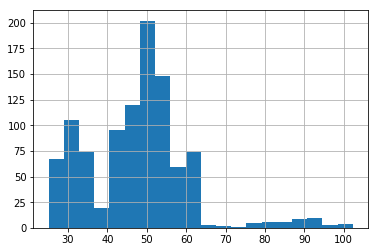

In [10]:
data['close_x'].hist(bins=20)
plt.show()

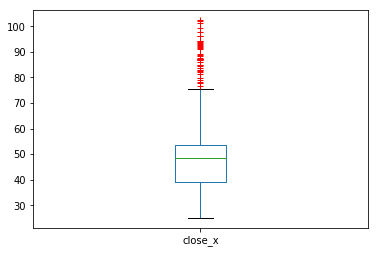

In [1290]:
data[['close_x']].plot.box(sym='r+')

# Criacao de Novos Dados

In [11]:
compra = 1 
venda = -1
valorAnterior = [];
resultado = []
diferenca = []
diff_dias = 7
for index, value in enumerate(data['close_x'].values, start=0):
    valorAnterior.append(value);
    if index-diff_dias >= 0:            
        diferenca.append(int(value - valorAnterior[index-diff_dias]))
        
        if value >= valorAnterior[index-diff_dias]:
            resultado.append(compra)         
        else:
            resultado.append(venda)        
    else:
        resultado.append(0)
        diferenca.append(int(value - 0))
        
valorAnterior = None        
  
data['resultado'] = resultado
data['diferenca'] = diferenca

data['media_5'] = data.iloc[:,0].rolling(window=5).mean()
data['media_21'] = data.iloc[:,0].rolling(window=21).mean()
mm_Resultado = []
mm_Diferenca = []                
for index, row in data.iterrows():
    valueMM21 = row['media_21']    
    valueMM5 = row['media_5']     
    if valueMM21 is None:
       mm_Resultado.append(venda)
       mm_Diferenca.append(0)
    elif valueMM5 > valueMM21:       
       mm_Resultado.append(compra)
       mm_Diferenca.append(int(valueMM5 - valueMM21))         
    elif valueMM5 < valueMM21:
       mm_Resultado.append(venda)
       mm_Diferenca.append(int(valueMM5 - valueMM21))       
    else: #valueMM5 == valueMM21:    
       mm_Resultado.append(venda)
       mm_Diferenca.append(0)
                
data['mm_Resultado'] = mm_Resultado
data['mm_Diferenca'] = mm_Diferenca

data = data[data['media_21'].notnull()]
data = data[data['close_y'].notnull()]

In [12]:
data = data.drop(['mm_Diferenca', 'media_5', 'media_21', 'diferenca', 'mm_Diferenca'], axis=1)
data

,close_x,close_y,Taxa ano,Fator diario,ultimo,resultado,mm_Resultado
date,,,,,,,
2017-01-31,32.180000,3.125500,12.9,1.000482,80.40,1,1
2017-02-01,32.889999,3.150100,12.9,1.000482,83.12,1,1
2017-02-02,32.660000,3.128000,12.9,1.000482,83.82,-1,1
2017-02-03,30.610001,3.122500,12.9,1.000482,80.15,-1,1
2017-02-06,29.920000,3.119500,12.9,1.000482,79.15,-1,1
...,...,...,...,...,...,...,...
2021-01-22,92.629997,5.349500,1.9,1.000075,169.82,-1,-1
2021-01-26,91.750000,5.465500,1.9,1.000075,169.52,-1,-1
2021-01-27,89.199997,5.353800,1.9,1.000075,169.26,-1,-1


In [15]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.show()
    return res

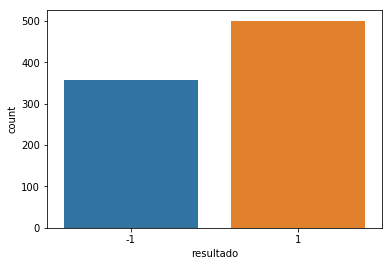

,values,n,perc
1,1,501,58.324
-1,-1,358,41.676


In [16]:
freq(data.resultado, plot=True)

# Coeficiente de Correlação de Pearson

Também chamado de “coeficiente de correlação produto-momento” ou simplesmente de “ρ de Pearson” mede o grau da correlação (e a direção dessa correlação — se positiva ou negativa) entre duas variáveis. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.
A formula desenvolvida por Karl Pearson, há mais de 120 anos, continua a ser a mais utilizada para o cálculo da correlação.
Calcula-se o coeficiente de correlação de Pearson pela seguinte fórmula:
<img src="https://miro.medium.com/max/545/1*KWAowigAR0EqWMmSBwOsqg.png">
A correlação de Pearson mede a associação linear entre variáveis contínuas. É o valor que indica o quanto a relação entre as variáveis pode ser descrita por uma reta.

Interpretando o valor de ρ:
0.9 a 1 positivo ou negativo indica uma correlação muito forte.
0.7 a 0.9 positivo ou negativo indica uma correlação forte.
0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [17]:
#Verifica a correlação entre as variáveis candidatas
data.corr()

,close_x,close_y,Taxa ano,Fator diario,ultimo,resultado,mm_Resultado
close_x,1.000000,0.704257,-0.786296,-0.788516,0.770287,0.160933,0.222750
close_y,0.704257,1.000000,-0.877803,-0.884076,0.710734,0.131393,0.167446
Taxa ano,-0.786296,-0.877803,1.000000,0.999848,-0.640121,-0.151365,-0.200974
Fator diario,-0.788516,-0.884076,0.999848,1.000000,-0.648591,-0.151866,-0.201485
ultimo,0.770287,0.710734,-0.640121,-0.648591,1.000000,0.069339,0.136445
resultado,0.160933,0.131393,-0.151365,-0.151866,0.069339,1.000000,0.505079
mm_Resultado,0.222750,0.167446,-0.200974,-0.201485,0.136445,0.505079,1.000000


# Preparação base de Teste

Preparando base teste LogicRegression

In [28]:
X_lg= data.drop(['resultado'], axis=1)
y_lg= data['resultado']
    
X_lg_train, X_lg_test, y_lg_train, y_lg_test = train_test_split(X_lg,y_lg,test_size=0.2, train_size=0.8,shuffle=False)
#X_lg_train.shape

Preparando base teste Regressão Linear

In [29]:
data_general = data.drop(['resultado', "mm_Resultado"], axis=1)
X= data_general.drop(['close_x'], axis=1)
y= data_general['close_x']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

# Criação dos Modelos

In [30]:
# Métricas R2 Score, MAE e RMSE para avaliação do modelo
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def score_and_error(model, Xtrain, ytrain):
    ypred = model.predict(Xtrain)
    r2 = r2_score(ytrain, ypred)
    mae = mean_absolute_error(ytrain, ypred)
    mse = mean_squared_error(ytrain, ypred)
    print("R^2:", r2, "MAE:", mae, "RMSE:", np.sqrt(mse))

In [21]:
logreg = LogisticRegression(C=100, solver='lbfgs', max_iter=1000).fit(X_lg_train, y_lg_train)
predictions = logreg.predict(X_lg_test)
predictions.shape

(172,)

Regressão Linear

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
score_and_error(lr_model, X_train, y_train)

R^2: 0.763852025353648 MAE: 5.235965999460213 RMSE: 6.537287696195006


Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
score_and_error(dtr_model, X_train, y_train)

R^2: 1.0 MAE: 0.0 RMSE: 0.0


Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42, n_jobs=-1).fit(X_train, y_train)
score_and_error(rfr_model, X_train, y_train)

R^2: 0.9931158711789666 MAE: 0.5630365454632303 RMSE: 1.1161690599098566


Extra Trees

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
model_etr = ExtraTreesRegressor(random_state=42, n_jobs=-1).fit(X_train, y_train)
score_and_error(model_etr, X_train, y_train)

R^2: 1.0 MAE: 0.0 RMSE: 0.0


Polynomial Regression

In [38]:
# Transforma em polinômios
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)

from sklearn.linear_model import LinearRegression
model_pr = LinearRegression().fit(X_poly, y_train)
score_and_error(model_pr, X_poly, y_train)

R^2: 0.9233945844061958 MAE: 2.871212759808354 RMSE: 3.7233616559413916


SGD (Stochastic Gradient Descent) Regression

In [39]:
# Requer padronização dos dados
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_train)

from sklearn.linear_model import SGDRegressor
model_sgdr = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42).fit(X_scaled, y_train.ravel())
score_and_error(model_sgdr, X_scaled, y_train.ravel())

R^2: 0.7606777503933082 MAE: 5.189322221798346 RMSE: 6.58107778117786


# Medindo a performance do Modelo Regressão Logistica

Embora existam outras maneiras de medir o desempenho do modelo (precision, recall, F1 Score, ROC Curve, etc.), vamos manter isso simples e usar a precisão como nossa métrica.
Para fazer isso, veremos o desempenho do modelo nos novos dados (conjunto de teste)
a precisão é definida como:
(fração de previsões corretas): previsões corretas / número total de pontos de dados 

In [40]:
score = logreg.score(X_lg_test,y_lg_test)

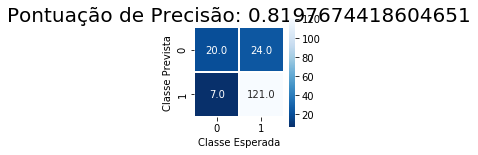

In [41]:
cm = metrics.confusion_matrix(y_lg_test, predictions)
#print(cm)


plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Classe Prevista');
plt.xlabel('Classe Esperada');
all_sample_title = 'Pontuação de Precisão: {0}'.format(score)
plt.title(all_sample_title, size = 20);

Resultados Regressão Logistica


In [42]:
print ("Coeficiente das características na função de decisão: {}".format(logreg.coef_))
print ("Intercept (também conhecido como viés) adicionado à função de decisão: {}".format(logreg.intercept_))
print ("Base treinamento  score: {:.2f}".format(logreg.score(X_lg_train,y_lg_train)))
print ("Teste score: {:.2f}".format(logreg.score(X_lg_test,y_lg_test)))

Coeficiente das características na função de decisão: [[ 0.01415237  0.15661187  0.00555131  0.02595954 -0.01536556  1.07036775]]
Intercept (também conhecido como viés) adicionado à função de decisão: [0.02595906]
Base treinamento  score: 0.75
Teste score: 0.82


# Medindo a performance do Modelo Regressão

Regressão Linear

In [44]:
predicao = lr_model.predict(X_test)
df = pd.DataFrame (predicao, columns = ['Predito'])
df["close_x"] = y_test.tolist() 
df['ERRO'] = df.apply(lambda x: x['close_x'] - x['Predito'], axis=1)

In [46]:
r2_train = lr_model.score(X_train, y_train)
r2_test = lr_model.score(X_test, y_test)

print('Score treino: %.2f' % r2_train)
print('Score teste: %.2f' % r2_test)

Score treino: 0.76
Score teste: 0.74


In [ ]:
Random Forest Regression

In [47]:
predicao = rfr_model.predict(X_test)
df = pd.DataFrame (predicao, columns = ['Predito'])
df["close_x"] = y_test.tolist() 
df['ERRO'] = df.apply(lambda x: x['close_x'] - x['Predito'], axis=1)
df

,Predito,close_x,ERRO
0,48.885000,50.090000,1.205000
1,50.175999,50.950001,0.774002
2,32.247000,31.860001,-0.387000
3,43.917000,43.070000,-0.847001
4,52.457000,53.099998,0.642999
...,...,...,...
279,55.998000,52.189999,-3.808001
280,61.964000,60.790001,-1.173999
281,49.123000,49.299999,0.177000
282,30.091000,29.510000,-0.581000


# Validando o modelo


In [49]:
RMSE = mean_squared_error(y_test, lr_model.predict(X_test))**0.5
RMSE

7.060538112735784

In [50]:
def plot_learning_curves (model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append (mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.ylabel('RMSE');
    plt.xlabel('Tamanho do Conjunto de Treinamento');    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


Random Forest Regression

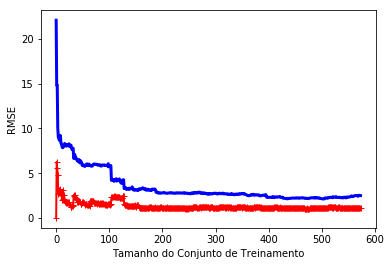

In [51]:
plot_learning_curves(rfr_model, X, y)

Valores reais x valores da predição

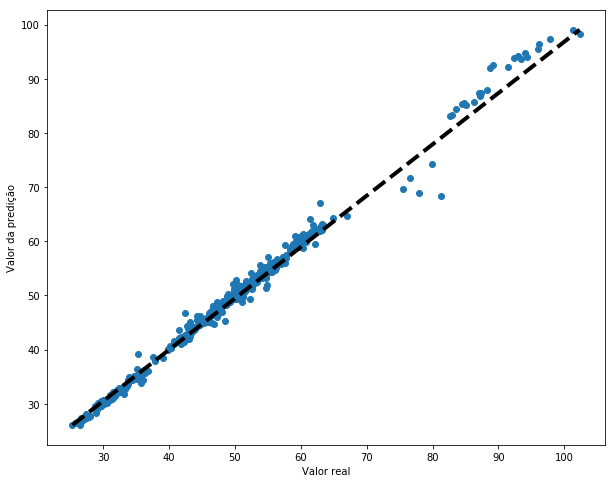

In [52]:
y_pred = rfr_model.predict(X_train)
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_train[:1000], y_pred[:1000])
ax.plot([y_train.min(), y_train.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor da predição')
plt.show()